In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Data Exploration

* First, we decided on the topic of the housing market, and found that Zillow contained relevant data. After looking through the information that Zillow could provide, we decided that MN was the most relevant, and, in some cases, to compare it to the whole of the United States to see if they followed the same trends and how much of a relationship there was between each set of numbers.

In [2]:
# Define different data files
sale_counts_file = "Sale_Counts_2019.csv"
three_yr_counts_file = "Sale_Counts_Reformatted_3Year.csv"
three_yr_prices_file = "Median_Sale_Prices_Reformatted_3Year.csv"

In [3]:
# Put data files into dataframes
counts_df = pd.read_csv(sale_counts_file)
three_yr_counts_df = pd.read_csv(three_yr_counts_file)
three_yr_prices_df = pd.read_csv(three_yr_prices_file)

In [4]:
# Merge the 3 year data
three_yr_merged_df = pd.merge(three_yr_counts_df, three_yr_prices_df, on=['RegionID','Year'], how='inner', suffixes = ('_count', '_price'))
three_yr_merged_df.head()

,RegionID,RegionName_count,StateCode_count,Year,Counts,RegionName_price,StateCode_price,Price
0,394865,"Minneapolis-St Paul, MN",MN,2017,69093,"Minneapolis-St Paul, MN",MN,233492
1,394543,"Duluth, MN",MN,2017,4925,"Duluth, MN",MN,139300
2,395030,"Rochester, MN",MN,2017,4282,"Rochester, MN",MN,182558
3,395118,"St. Cloud, MN",MN,2017,3302,"St. Cloud, MN",MN,164475
4,394823,"Mankato, MN",MN,2017,1554,"Mankato, MN",MN,171142


# The Cleanup Process

* The data we found was in a csv file, and not an API. There was a csv file with each piece of data – home sale prices, number of home sales, and days on the market. The csv files were also rather large and had a lot of columns as they were broken out my month from 2008 to 2020. So, our first steps were to narrow down the data in the csv files using Excel, and then we completed further cleanup in pandas. Based on our questions and how we wanted to generate our visuals, we had the files formatted a few different ways. In Excel, for some, we just removed all information except for 2019 or the last 3 years, and, others, we changed the layout to contain the month and year in rows instead of columns. All of them we narrowed down the data to MN and the whole of the United States. Within pandas, some of the files were merged, and the clean up steps involved replacing the zeroes with NaN to use the dropna function, and also deleting extra columns from the merge.

In [5]:
# Clean up the dataframes
counts_df.dropna(how='any')
three_yr_merged_df.replace(to_replace=0, value='NaN', regex=True)
three_yr_merged_df.dropna(how='any')
del three_yr_merged_df['RegionName_price']
del three_yr_merged_df['StateCode_price']
cleaned_df = three_yr_merged_df.rename(columns={'RegionName_count':'RegionName','StateCode_count':'StateCode'})

In [6]:
# Narrow down dataframes to the information needed
three_yr_MN_df = cleaned_df.loc[(cleaned_df['StateCode'] == 'MN'),['Counts', 'Price']]

MN_df = counts_df.loc[(counts_df['StateCode'] == 'MN'),['January', 'February', 'March', 'April', 
                                                        'May', 'June', 'July', 'August', 'September', 
                                                        'October', 'November', 'December']]

US_df = counts_df.loc[(counts_df['StateCode'] == 'US'),['January', 'February', 'March', 'April', 
                                                        'May', 'June', 'July', 'August', 'September', 
                                                        'October', 'November', 'December']]
# Add the data to variables for charting
total_counts = MN_df.sum()
months = total_counts.keys()
US_counts = US_df.sum()
US_months = US_counts.keys()

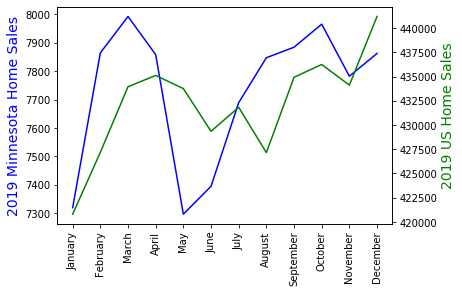

In [7]:
#Sometimes this works and sometimes it doesn't, just keep rerunning without changes
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make MN plot
ax.plot(months, total_counts, color="blue")

# set y-axis label
ax.set_ylabel("2019 Minnesota Home Sales",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make US plot with different y-axis using second axis object
ax2.plot(US_months, US_counts ,color="green")
ax2.set_ylabel("2019 US Home Sales",color="green",fontsize=14)

ax.set_xticklabels(months, rotation=90)

plt.show()

The correlation between MN and US home sales is 0.49.
The r-squared is: 0.2426


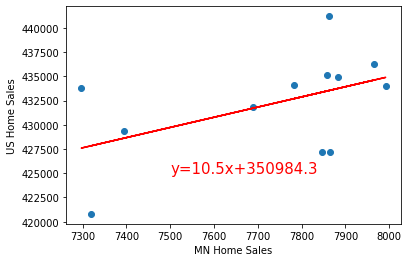

In [8]:
# Calculate correlation, r-squared and linear regression on US vs MN Home Sales
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_counts, US_counts)
regress_values = total_counts * slope + intercept
line_eq = "y=" +str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(total_counts, US_counts)
plt.plot(total_counts, regress_values, "r-")
plt.annotate(line_eq,(7500,425000),fontsize=15,color='red')
plt.xlabel('MN Home Sales')
plt.ylabel('US Home Sales')
correlation = st.pearsonr(total_counts, US_counts)
print(f'The correlation between MN and US home sales is {round(correlation[0],2)}.')
print(f'The r-squared is: {round(rvalue**2,4)}')
plt.show()

# MN vs US Home Sales - Data Used, the Analysis Process & Conclusions

* The first question we had was, what is the best month of the year for buying and selling in Minnesota and how much does it affect the number of homes sold in all of the U.S.? We all assumed that it would be May, being that we’ve heard Spring is the busiest season and it’s the first relatively warm month of the year. For this information, we decided the most recent year of data was most relevant and went with monthly data from 2019. 

* We started off with two line charts, and found a way to combine them into one figure with two different y-axes values, so you could view the lines on top of each other. We also calculated the Pearson’s correlation coefficient, and did a linear regression analysis of the number of Minnesota Home Sales. 

* From the line charts, you can conclude that we were completely wrong about May being the best time to buy or sell a home in Minnesota considering May is the month with the lowest number of homes sold. It turns out last year that the month with the most home sales was March. However, in the Unites States, the lowest month was January and the highest month was December. In both cases, we were incorrect about May being the best home sales month. If you evaluate the correlation between the number of homes sold in Minnesota and in the United States, the value is .49. Zero implies no relationship, and positive one implies a positive relationship between the two factors and all points lying on the line. So, with this, we can determine that MN home sales do have a positive effect on the United States, as you would suspect. If we use the r-squared value, we can also determine that the MN home sales affect the United States home sales, but the relationship is on the weaker side because only about 25% of the points fall on the line. 

The correlation between sale price and number of homes sold is 0.56.
The r-squared is: 0.3164


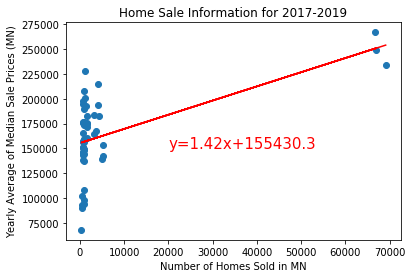

In [9]:
# Calculate correlation, r-squared and linear regression on MN Home Sales vs Sale Prices
MN_counts = three_yr_MN_df['Counts']
MN_prices = three_yr_MN_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(MN_counts, MN_prices)
regress_values = MN_counts * slope + intercept
line_eq = "y=" +str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(MN_counts, MN_prices)
plt.plot(MN_counts, regress_values, "r-")
plt.annotate(line_eq,(20000,150000),fontsize=15,color='red')
plt.xlabel('Number of Homes Sold in MN')
plt.ylabel('Yearly Average of Median Sale Prices (MN)')
plt.title('Home Sale Information for 2017-2019')
correlation = st.pearsonr(MN_counts, MN_prices)
print(f'The correlation between sale price and number of homes sold is {round(correlation[0],2)}.')
print(f'The r-squared is: {round(rvalue**2,4)}')
plt.show()

# MN Sale Prices vs MN Homes Sold - Data Used, the Analysis Process & Conclusions

* The question we had for this diagram was, how much of an effect does the number of homes sold have on the median sale price in Minnesota? The data used for this plot is 2017-2019, and the points are regions in MN that contained a price and a number of home sales each month over the course of these 3 years. This data was merged on the region and the year. For this plot, we were illustrating if the number of homes sold had a strong effect on the median sale price in Minnesota, like we suspected it did. 

* Each point represents the home sale count and average of the median sale price for the year of a region in Minnesota. In addition to creating a scatter plot, we calculated the Pearson’s correlation coefficient, and did a linear regression analysis.

* First, we noticed the 3 data points hanging out by the maxes of the axes. We determined that this is because the largest region is the Twin Cities, and all the other regions with all the data are very small compared to it. The correlation between number of homes sold and median sale price in Minnesota is .49. Again, zero implies no relationship, and positive one implies a positive relationship. If this number is accurate, it tells us that homes sold does have a positive affect on the median sale price, as suspected. If we use the r-squared value, we can also determine that the relationship is on the weaker side because only about 30% of the points fall on the line, but there is a relationship between the numbers.
